In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2025-03-26 12:37:33.422586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Incarcare set de date
data=np.loadtxt("rezultate_fepe_sortate.csv", delimiter=",")
x=data[:, :2]  # sunt selectate toate liniile si numai primele doua coloane
y=data[:, 2]  # sunt selectate toate liniile si numai a treia coloana

In [4]:
# Normarea datelor
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

# Splitarea datelor
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)  # 20% dintre date (0.2) merg in setul de test si restul raman pentru antrenare

# Salvare scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [5]:
# Definirea RETELEI NEURONALE
model=keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="linear")  # 1 output neuron
])

/home/georgepata/anaconda3/envs/tf-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compilarea modelului
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [7]:
# Antrenarea modelului
history=model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0073 - mae: 0.0567 - val_loss: 0.0037 - val_mae: 0.0260
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0192 - val_loss: 0.0023 - val_mae: 0.0202
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0212e-04 - mae: 0.0132 - val_loss: 0.0016 - val_mae: 0.0166
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mae: 0.0146 - val_loss: 9.6135e-04 - val_mae: 0.0131
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6506e-04 - mae: 0.0102 - val_loss: 5.6877e-04 - val_mae: 0.0092
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0429e-04 - mae: 0.0067 - val_loss: 3.6224e-04 - val_mae: 0.0062
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9438e-04 - mae: 0.0053 - val_loss: 2.4331e-04 - val_mae: 0.0062
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1148e-04 - mae: 0.0060 - val_loss: 1.7842e-04 - val_mae: 0.0060
Epoch 9/100
30/30 ━━━━━

In [8]:
# Evaluarea modelului
loss, mae=model.evaluate(x_test, y_test)
print(f"Test MAE: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5072e-05 - mae: 0.0041 
Test MAE: 0.004184933844953775


In [9]:
# Salvarea modelului in directory-ul curent
model.save("germanium_fepe_nn.keras")

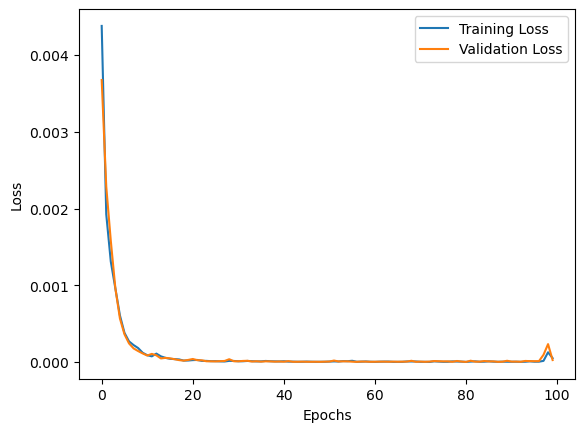

In [10]:
# Plotarea curbelor de invatare
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()